# Numerical Methods for Boundary Value Problems

## 1  Introduction

In this notebook we present the required theory and the methodology of constructing solvers for two-point
boundary value problems as well as Sturm-Liouville eigenvalue problems. Basic finite difference methods are introduced by a thorough implementation. However, we do not consider making the solver adaptive and neither do we consider nonlinear problems as they present additional
difficulties. We present a few applications of the theory, such as quantum mechanics. 

## 2  Theory
### 2.1  The BVP $y''  =  f(x,y)$
To solve this boundary value problem 
$$
\begin{align}\label{eq: bvp}
    &y''  =  f(x,y) \\ 
 &y(0) = \alpha,   \;     y(L) = \beta \nonumber
\end{align}
$$

We introduce an equidistant grid on $[0,L]$ where $\Delta x = L/(N+1)$. We discretize the derivative with a symmetric finite difference quotient and obtain

$$
\begin{align}
   & \frac{y_{i+1} - 2y_i + y_{i-1}}{\Delta x^2}   =  f(x_i,y_i) \label{eq: FDM}\\ 
 & y_0 = \alpha, \nonumber   \;     y_{N+1} = \beta
\end{align}
$$

This leads to a system of $N$ equations which approximate the values of $y(x_1),y(x_2),...,y(x_N)$. If we also let $F(y) = 0$ then the equations will look like (for $i = 1, \dots ,N$)

$$
\begin{align}
  &F_1(y) =  \frac{y_{2} - 2y_1 + \alpha } {\Delta x^2}  -  f(x_1,y_1) \nonumber\\ 
  &F_i(y) = \frac{y_{i+1} - 2y_i + y_{i-1}}{\Delta x^2}   -  f(x_i,y_i) \label{eq: method} \\ 
  &F_N(y) = \frac{\beta - 2y_N + y_{N-1}}{\Delta x^2}   -  f(x_N,y_N).\nonumber
\end{align}
$$

In this notebook we will only consider problems where $f(x,y) \equiv f(x)$ meaning that the right-hand side is independent of $\mathbf{y}$ and since we let $\mathbf{F}(\mathbf{y}) = 0$ the system above can be written as

$$
\begin{align}\label{eq:fdmdiscr}
    %1/\Delta x^2
    \frac{1}{\Delta x^2}
     \begin{bmatrix}
        -2 & 1 & 0 & \dots &  0\\
         1 & -2 &  1 &     &  \vdots \\
        0  &  1 & -2 & 1   &  \\
        \vdots  &    &    & \ddots & \\
        0 & \dots   &  0 & 1  & -2 \\
     \end{bmatrix}
        \begin{bmatrix}
    y_1 \\
    y_2 \\
    \vdots \\
     y_{N-1}\\
     y_N 
    \end{bmatrix}
      =
     \begin{bmatrix}
         -\alpha / \Delta x^2 + f(x_1) \\
         f(x_2) \\ 
         \vdots \\ 
         f(x_{N-1}) \\
         -\beta / \Delta x^2 + f(x_N)
     \end{bmatrix}. 
\end{align}
$$

We denote

$$
\begin{align*}
    \frac{1}{\Delta x^2}\text{tridiag}(1,-2,1)=T_{\Delta x}.
\end{align*}
$$

The matrix is sparse resulting in that solving the matrix has low complexity and the LU decomposition needs $3N$ operations (compared to $N^3/3$ operations needed for a full matrix). We will make use of this through the SciPy 2-D sparse array Python package for numeric data.

### 2.2  Error analysis
For error analysis we need the following three definitions:

**Definition 1** *The global error is the function $e$ that satisfies $e(x_i)=y_i-y(x_i)$.*

**Definition 2** *The Root-Mean-Square norm is defined as*

$$
\begin{align*}
    \lVert \mathbf{e} \rVert_{\text{RMS}}= \sqrt{\sum _{k=0}^N e(x_k)^2 \Delta x}= \sqrt{\Delta x}\;\lVert \mathbf{e} \rVert_{2}.
\end{align*}
$$

**Definition 3** *A method is convergent of order $p$ if*

$$
\begin{align*}
 \lVert \mathbf{e} \rVert_{\text{RMS}} = \Big\lVert \big[e(x_1), e(x_2),...,e(x_N)\big]^T\Big\rVert_{RMS}=\mathcal{O}(\Delta x^p).
\end{align*}
$$

We also present a proposition without proof.

**Proposition 1**
*The method in equation (3) is convergent of order $2$.*

### 2.3  The Beam equation

We use the beam equation as an application to illustrate our BVP solver. When an elastic beam is under load it deflects in accordance with its material properties and the applied load. The deflection u is given by the differential equations

$$
\begin{align}\label{eq: beam}
    & M''  =  q(x),\\ 
 & u'' = M(x)/(EI), \nonumber
\end{align}
$$

where $q(x)$ is the load density (N/m), $M(x)$ is the bending moment (Nm), $E$ is Young's modulus of elasticity ($\text{N/m}^2$), I is the beam's cross-section moment of inertia ($\text{m}^4$) and $u$ is the beam's centerline deflection (m). 

### 2.4  Sturm-Liouville eigenvalue problems

The standard form of a Sturm-Liouville is 

$$
\begin{align*}
   \frac{d}{dx}\left(p(x) \frac{dy}{dx}\right) - q(x)y = \lambda y \\ 
 y(a) = 0, y(b) = 0
\end{align*}
$$

where $p(x) > 0$ and $q(x) \geq 0$. The Sturm-Liouville problem can be discretized by standard symmetric 2nd order finite differences to obtain the eigenvlaue problem

$$
\begin{align}
\label{eq:sldiscr}
 T_{\Delta x}\mathbf{y} = \lambda_{\Delta x} \mathbf{y}.
\end{align}
$$

If $p(x)$ is differentiable we can use the same technique as in 1.1. The discretization has $N$ real eigenvalues

$$
\begin{align}\label{eq: eigenvOrdo}
    \lambda_{\Delta x} = \lambda + O(\Delta x^2).
\end{align}
$$

### 2.5 The Schrödinger equation

We use The Schrödinger equation as an application of our Sturm-Liouville problem solver. A quantum particle trapped in a one-dimensional potential $V(x) \geq 0$ has a stationary wave function $\psi (x)$ satisfying the Schrödinger equation

$$
\begin{align} 
\label{eq: schrödinger}
 \psi '' - V(x)\psi = -E\psi
\end{align}
$$

where E is the energy level of the particle. We assume also that the potential is infinite outside of the interval $[0,1]$, then $\psi (0) = \psi (1) = 0$. This is a Sturm-Liouville problem for determining the wave function $\psi$ and energy level $E$. $\lvert \psi ^2 \rvert$ is also of interest since that is the probability of finding the particle at $x$.  Since a measurement must be a value between $-\infty$ and $\infty$ we have

$$
\begin{align*}
    P(-\infty\geq x\leq \infty) = \int_{-\infty}^{\infty}|\psi(x)|^2\;dx=1.
\end{align*}
$$

The discretization of equation (8) becomes

$$
\begin{align*}
    T_{\Delta x}\mathbf {\psi}-\mathbf{V}\mathbf{\psi}=-E\mathbf{\psi} \iff  \left(T_{\Delta x}-I\mathbf{V}\right)\mathbf {\psi}=-E\mathbf{\psi}.
\end{align*}
$$

Thus this problem is of the same sort of (6) but instead the matrix discretization is

$$
\begin{align}\label{eq: schrödingerdiscr}
    \frac{1}{\Delta x^2}\text{tridiag}(1,-2,1) - \text{diag}(V(x_i))
\end{align}
$$

and the eigenvalues would be $-E$.

## 3  Solving the two point BVP

In [3]:
# relevant libraries and functions
import numpy as np
import scipy as scipy
from numpy import mean, sqrt, square, arange
import math as math
import matplotlib.pyplot as plt
import scipy as sp
from sklearn.linear_model import LinearRegression
from scipy.sparse import diags
from scipy.sparse.linalg import spsolve, eigs
from scipy.signal import unit_impulse

plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 100
plt.rcParams['figure.figsize'] = [5, 5]

### 3.1  2pBVP
To solve the BVP stated in equation (1) we construct a python function `2pBVP`. In `2pBVP` the system in equation (4) is set up and then solved. Since the system is rather sparse we store the $T_\Delta x$ as a sparse matrix using `scipy.sparse.diags` and solve the system with `scipy.sparse.linalg.spsolve`. Additionaly, we must not forget that we solve the system only for the interior points, and that the boundary points should be added to the solution after calling the function.

In [4]:
def twopBVP(fvec, alpha, beta, L, N):
    dx2= (L/(N+1))**2
    A = (1/dx2)* diags([-2*np.ones(N), np.ones(N-1), np.ones(N-1)], [0,-1,1]) # sparse representation of  tridiagonal matrix
    fvec[0]= fvec[0] -alpha/dx2 # boundary conditions
    fvec[-1]= fvec[-1] - beta/dx2 # boundary conditiona
    sol = spsolve(A, fvec) # solves X for AX=f
    return sol

Applying the solver to the simple ODE $y''= \sin{x}, \;y(0)=y(10\pi)=0$, which has the exact solution $y=\sin{x}$, and plotting yields:

C:\Users\Ali\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


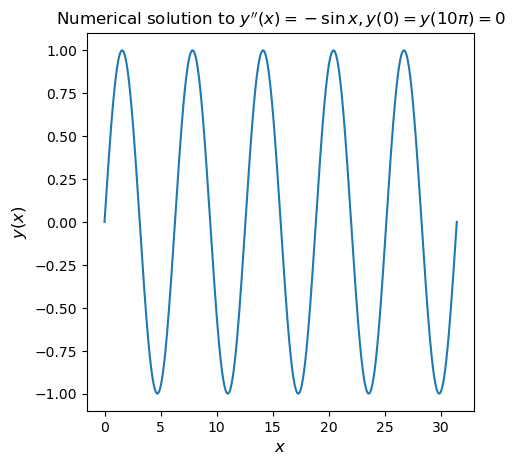

In [5]:
N = 9999 #nbr of interior points
L = 10*math.pi
alpha=0
beta=0
dx= (L/(N+1))
fvec = -np.sin(np.linspace(dx, L-dx, num=N)) # -sin(x)

sol=twopBVP(fvec, alpha, beta, L, N) #exact solution is just sin(x)
sol = np.insert(sol, 0, alpha, axis=0) #insert boundaries
sol= np.append(sol, [beta]) #insert boundaries
plt.plot(np.linspace(0, L, num=N+2), sol);

plt.xlabel("$x$", fontsize=12)
plt.ylabel("$y(x)$", fontsize=12)
plt.title("Numerical solution to $y''(x)=-\sin{x}, y(0)=y(10\pi)=0$");

which reflects the solution well.

###  3.2 Error Analysis
We would like to confirm that the order of convergence is $2$ as stated in proposition 1. We do this by first calculating the global error at every point as described in definition 1. Then we calculate  $\lVert \mathbf{e} \rVert_{\text{RMS}}$ according to definition 2 and 2. We do this procedure for different $\Delta x$ ($N$ from $1$ to $1000$) and plot $\lVert \mathbf{e} \rVert_{\text{RMS}}$ as a function of $\Delta x$. We use a loglog plot to find $p$ in $\Delta x^p$ by finding the slope. 

C:\Users\Ali\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


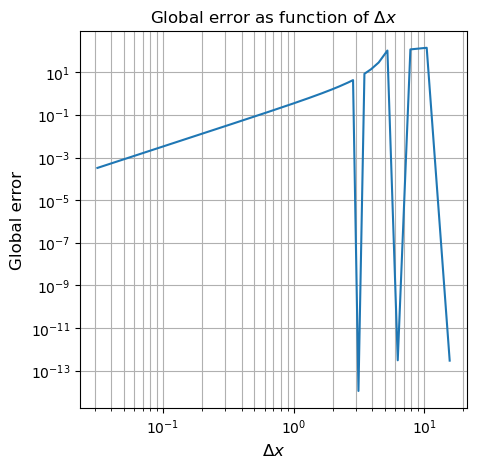

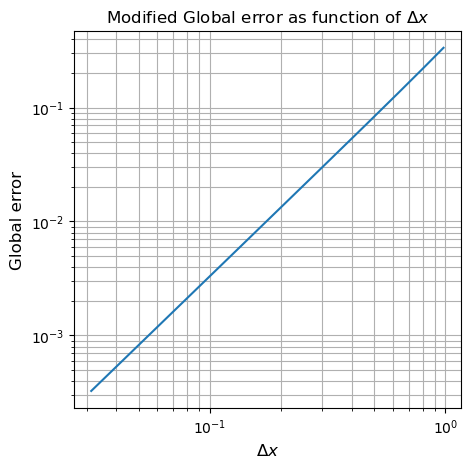

[[2.00443188]]


In [6]:
e_rms=np.array([]) #array of global errors for each delta x


L = 10*math.pi
alpha=0
beta=0
dx_arr=[] #array of different delta x

for N in range(1,1000): # Find global errors for different N (or rather different delta x)
    dx= (L/(N+1)) 
    dx_arr = np.append(dx_arr, [dx]) 
    fvec = -np.sin(np.linspace(dx, L-dx, num=N)) # -sin(x)

    sol=twopBVP(fvec, alpha, beta, L, N) #exact solution is just sin(x)

    e = sol - np.sin(np.linspace(dx, L-dx, num=N)) 
    rms = sqrt(dx)* np.linalg.norm(e) #rms norm of global error
    e_rms= np.append(e_rms, [rms])

plt.loglog(dx_arr, e_rms)
plt.xlabel("$\Delta x$", fontsize=12)
plt.ylabel("Global error", fontsize=12)
plt.title("Global error as function of $\Delta x$")
plt.grid(True, which= 'both', ls="-");
#plt.savefig('erroranalysisfaulty.svg', format='svg', dpi=1200)
plt.show()
# plotting this shows that for large dx the global error gets choppy because N will be small.
# Out of luck the approximation might be good for a few points and the global error will be low
# Thus we remove dx>1 for a better picture

dx_arr = np.array([x for x in dx_arr if x<1])
e_rms = e_rms[len(e_rms)-len(dx_arr):]
plt.loglog(dx_arr, e_rms)
plt.xlabel("$\Delta x$", fontsize=12)
plt.ylabel("Global error", fontsize=12)
plt.title("Modified Global error as function of $\Delta x$");
plt.grid(True, which= 'both', ls="-");
#plt.savefig('erroranalysis.svg', format='svg', dpi=1200)
plt.show()

#Regression fo modifed points
regressor = LinearRegression()
e_rms = np.log(e_rms.reshape(-1,1))
dx_arr = np.log(np.array(dx_arr).reshape(-1,1))
regressor.fit(dx_arr, e_rms)
print(regressor.coef_)

In the first figure we find that for large $\Delta x$ the global error gets choppy because N will be small. Out of luck the approximation might be good for a few points and the global error will be low. Thus we remove $\Delta x>1$ in the seconde figure for a better picture. Now we see that the global error in the loglog plot is a linear function with the slope $2$ which confirms the proposition. This is further confirmed by performing a linear regression of the loglog data for $\Delta x<1$ which yields a slope of $2.004$.

###  3.3 The Beam Equation
We apply our solver `2pBVP` to the beam equation described in (5). We define the constants and functions: $L=10\;\text{m}$, $E=1.9\cdot10^{11} \; \text{N/m^2}$, $I(x)=10^{-3} \cdot(3-2\cos^{12}{\frac{\pi x}{L}})$ and $q(x)=-50\; \text{kN/m}$. The beam is supported at its ends, at $x = 0$ and $x = L$. 
This means that there is no deflection there: $u(0) = u(L) = 0$. Further, assuming that the beam's ends do not sustain any bending moment, we also have the boundary conditions $M(0) = M(L) = 0$. Using the `2pBVP` with $N = 999$ interior grid points (corresponding to $\Delta x = 10^{-2}$
) we get the solution plotted. Computing the deflection at the beam's midpoint we find that the deflection is $11.741059 \;\text{mm}$.

C:\Users\Ali\anaconda3\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:144: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


The deflection at thebeam's midpoint : -0.011741059085875711


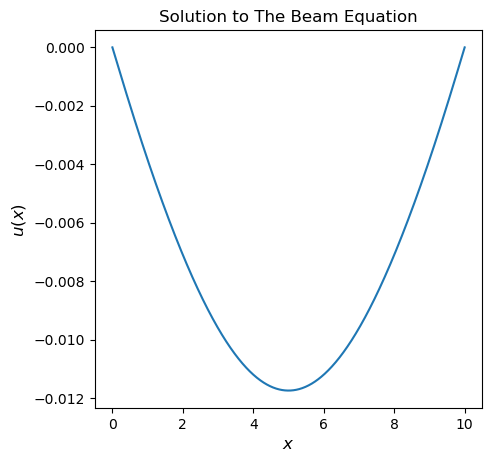

In [7]:
E = 1.9*(10**11)
L = 10

N = 999 #nbr of interior points
q = -50000 * np.ones(N)
alpha=0
beta=0
dx= (L/(N+1))

M = np.array(twopBVP(q, alpha, beta, L, N))

x = np.linspace(dx, L-dx, num=N)
I = 10**(-3) *(3-2*(np.cos((math.pi*x)/L))**12)
u=twopBVP(M/(E*I), alpha, beta, L, N) 
u = np.insert(u, 0, alpha, axis=0)
u= np.append(u, [beta])

plt.plot(np.linspace(0, L, num=N+2), u);
plt.xlabel("$x$ ", fontsize=12)
plt.ylabel("$u(x)$ ", fontsize=12)
plt.title("Solution to The Beam Equation");
plt.savefig('beamsol.svg', format='svg', dpi=1200)
print("The deflection at thebeam\'s midpoint :",u[500])

##  4 Solving Sturm-Liouville eigenvalue problems
###  4.1 Sturm-Liouville with Mixed Dirichlet-Neumann boundary conditions

We would like to solve the the Sturm-Liouville eigenvalue problem
$$
\begin{align*}
    & u'' = \lambda u,\\
    & u(0)=u'(1)=0.
\end{align*}
$$
Take note that we do not have pure Dirichlet boundary conditions but instead mixed Dirichlet-Neumann boundary conditions. This is a rather easy problem to solve exactly by hand and the solution would be
$$
\begin{align}\label{eq: slexact}
    \lambda_k=(k+\frac{1}{2})^2\pi^2,\;\;  u_k(x)=\sin{\Big((k+\frac{1}{2})\pi x\Big)}.
\end{align}
$$
On the other hand, solving the problem numerically would require a few more considerations on the matrix $T_{\Delta x}$ because of the mixed boundary conditions. We use a equidistant grid, $x_n= n\Delta x$ but now instead with $\Delta=\frac{1}{N}$ and $x_{N+1}=1 + \Delta x$. We approximate
$$
\begin{align*}
    y'(1)\approx \frac{y_{N+1}-y_{N-1}}{1\Delta x} = 0 \iff y_{N+1}=y_{N-1},
\end{align*}
$$
and applying this in equation (2) we find
$$
\begin{align*}
    f(x_N, y_N)=\frac{2y_{N-1}-2y_N}{\Delta x^2}.
\end{align*}
$$
This results in a modified $T_{\Delta x}$
$$
\begin{align*}
T_{\Delta x}=
    %1/\Delta x^2
    \frac{1}{\Delta x^2}
     \begin{bmatrix}
        -2 & 1 & 0 & \dots &  0\\
         1 & -2 &  1 &     &  \vdots \\
        0  &  1 & -2 & 1   &  \\
        \vdots  &    &    & \ddots & \\
        0 & \dots   &  0 & 2  & -2 \\
     \end{bmatrix}
\end{align*}
$$
We can construct the matrix in python in a similar way as before, not forgetting the 2 in the last element of the main sub-diagonal. This is done in the function `simpleSL`. We do not solve the system but instead use `scipy.sparse.linalg.eigs`, which returns both eigenvalues and eigenvectors, where we also can specify the number of wanted eigenvalues and in what order (e.g. the smallest). 

In [8]:
# Solves the SL problem y''(x)-V(x)*y(x)= lambda*y(x)
# eigenvectors should be true if we want the eigenvectors +eigenvalues otherwise false if only eigenvalues
# BC should be a string of either neumann or dirichlet (y(0)=y(L)=0 or y(0)=y'(L)=0)
#if V is not specified then V=0
def simpleSL(L, N, eigenvectors: bool, nbr, BC:str, V=None):
    if V is None:
        V=np.zeros(N)
    if(BC.lower()== 'neumann'):
        dx=L/N
        dx2= dx**2
        if N>1:
            sub= np.ones(N-2)
            sub = np.append(sub,[2]) # Last element in subdiagonal has a 2 instead of 1
        else:
            sub = np.ones(0)
        A = (1/dx2)* diags([-2*np.ones(N)-V*dx2, sub, np.ones(N-1)], [0,-1,1]) # sparse representation of  tridiagonal matrix
        eigen_values = eigs(A, k=nbr, which='SM')
    elif(BC.lower()=='dirichlet'):
        dx2= (L/(N+1))**2
        A = (1/dx2)* diags([-2*np.ones(N)-V*dx2, np.ones(N-1), np.ones(N-1)], [0,-1,1])
        eigen_values = eigs(A, k=nbr, which='SM')
        eigen_values = (eigen_values[0].real, eigen_values[1].real)
    else:
        raise Exception("input string should be neumann or dirichlet")
    if eigenvectors==False:
        eig = eigen_values[0]
        eig = [x.real for x in eig]
        return eig
    else:
        return eigen_values#[eigen_values[0],[eig1, eig2, eig3]]
    

We compute the approximated eigenvalues $\lambda_{\Delta x, i}$ for $N = 499$ (corresponding to $\Delta x = 2.004008\cdot 10^{-3}$) and the exact eigenvalues $\lambda_i$.

In [9]:
eig_499=simpleSL(1,499, False, 3, 'neumann')
print(eig_499)
L=1
#eig_exact_arr =-((2*np.linspace(1,3,num=3)-1)**2*np.pi**2)/(4*L**2)
eig_exact_arr =-((np.linspace(0,2,num=3)+0.5)**2*np.pi**2)
print(eig_exact_arr)

[-2.4673990627520688, -22.20644486559497, -61.68375408114595]
[ -2.4674011  -22.2066099  -61.68502751]


$$
\begin{align*}
    &\lambda_{\Delta x,1}\approx -2.4673991,  &\lambda_1\approx -2.4674011, \\
    &\lambda_{\Delta x,2}\approx -22.2064449,\,\,\, & \lambda_2\approx -22.2066099,  \\
    &\lambda_{\Delta x,3}\approx -61.6837541,\,\,\, & \lambda_3\approx -61.6850275.
\end{align*}
$$
Evidently the approximation is quite good. To confirm equation (7), i.e. that it is second order accurate, we plot the error $\lambda_{\Delta x}-\lambda$ for the first three eigenvalues versus N, the number of interior grid points.

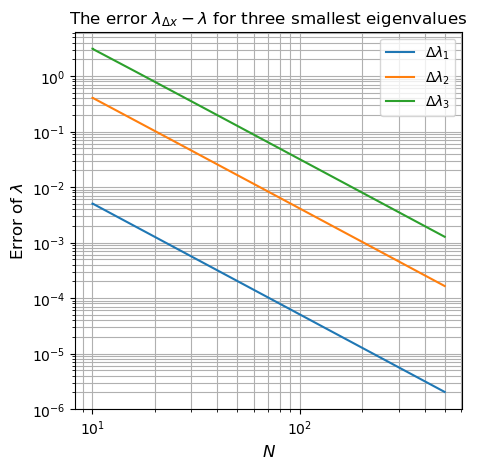

In [10]:
N_s = np.linspace(10,499, 495).astype(int)
eig_num_arr =np.array([[],[],[]])
for N in N_s:
    eig_num = [[item] for item in simpleSL(1,N, False, 3, 'neumann')]
    eig_num_arr= np.concatenate((eig_num_arr, eig_num), axis=1)

plt.loglog(N_s, [x-eig_exact_arr[0] for x in eig_num_arr[0]])
plt.loglog(N_s, [x-eig_exact_arr[1] for x in eig_num_arr[1]])
plt.loglog(N_s, [x-eig_exact_arr[2] for x in eig_num_arr[2]])
plt.xlabel("$N$", fontsize=12)
plt.ylabel("Error of $\lambda$", fontsize=12)
plt.title("The error $\lambda_{\Delta x}-\lambda$ for three smallest eigenvalues")
plt.legend(["$\Delta\lambda_{1}$", "$\Delta\lambda_{2}$", "$\Delta\lambda_{3}$"], loc ="upper right");
plt.grid(True, which= 'both', ls="-");
plt.savefig('lambdaerror.svg', format='svg', dpi=1200)

In the plot we see that the order is indeed 2 and this can be further confirmed by a linear regression.

The approximated eigenmodes (eigenfunctions) are also plotted together with the exact eigenmodes.

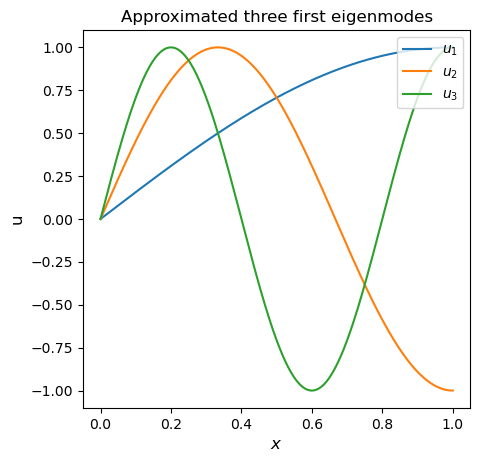

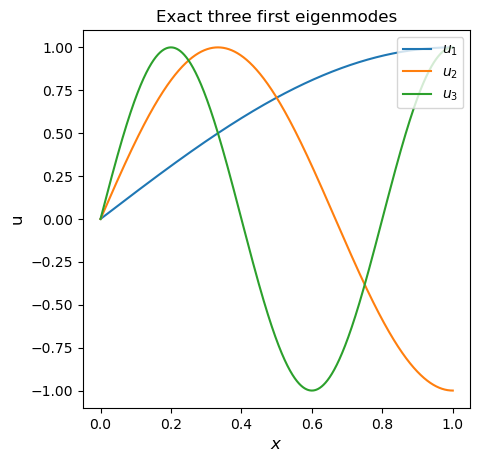

In [11]:
a=simpleSL(1, 1000, True, 3, 'neumann')
b=a[1]
b=np.array([x.real for x in b[:,0]])
b = np.insert(b, 0, 0, axis=0)
b = b/np.max(np.abs(b))
if(b[1]<0):
    b=-b

c=a[1]
c=np.array([x.real for x in c[:,1]])
c = np.insert(c, 0, 0, axis=0)
c = c/np.max(np.abs(c))
if(c[1]<0): # eigenvector can multiply by constant, want all that start with positive for better visualization
    c=-c

d=a[1]
d=np.array([x.real for x in d[:,2]])
d = np.insert(d, 0, 0, axis=0)
d = d/np.max(np.abs(d))
if(d[1]<0):
    d=-d

plt.plot(np.linspace(0,1,num=1001),b) # 
plt.plot(np.linspace(0,1,num=1001),c)
plt.plot(np.linspace(0,1,num=1001),d);
plt.xlabel("$x$", fontsize=12)
plt.ylabel("u", fontsize=12)
plt.title("Approximated three first eigenmodes")
plt.legend(["$u_1$", "$u_2$", "$u_3$"], loc ="upper right");
plt.savefig('eigenmodesapprox.svg', format='svg', dpi=1200)

plt.show()

for i in range(3):
    plt.plot(np.linspace(0,1,num=10000),np.sin((i+0.5)*np.pi*np.linspace(0,1,num=10000)))

plt.xlabel("$x$", fontsize=12)
plt.ylabel("u", fontsize=12)
plt.title("Exact three first eigenmodes")
plt.legend(["$u_1$", "$u_2$", "$u_3$"], loc ="upper right");
plt.savefig('eigenmodesexact.svg', format='svg', dpi=1200)
plt.show()

We want to apply our theory about Sturm Liouville eigenvalue problems to a physical problem, namely the Schrödinger equation. The problem is stated in chapter 1.5 thoroughly, but is boiled down to determining the wave function $\psi(x)$, the probability density $|\psi(x)|^2$ and the energy levels $E$ given a one-dimensional potential $V(x)$. As stated in chapter 1.5 this is equivalent (approximately) of finding the eigenvalues and eigenvector of the matrix in equation (9). What we want is very similar to our python function `simpleSL` other than different boundary conditions and input $V(x)$. Instead of rewriting code we extend our function `simpleSL` to be able to handle both $y(0)=y(L)=0$ and $y(0)=y'(L)=0$ and some input $V(x)$. Then we construct a function, `schrödinger` that solves the problem, rather easily. We use `scipy.integrate.simps` to calculate 
$$
\begin{align*}
  \int_{-\infty}^{\infty}|\psi(x)|^2\;dx,
\end{align*}
$$
in order to normalize the energy function $\psi(x)$ into $\hat{\psi}(x)$. Just as before, $-E$ is an eigenvalue and for each eigenvalue there is a corresponding eigenfunction $\psi$. As is customary in physics, we plot the wave functions and probability densities at the energy
level, that is $\hat{\psi}_k(x)+E_k$ and $|\hat{\psi}_k(x)|^2+E_k$. For the solutions to be visualized clearly we have to do some arbitrary scaling of $E$ and the eigenfunctions. 

In [19]:
def schrödinger(L, N, eigenvectors: bool, nbr, BC:str, V, text:str, scaleE=1,scaleWave=1, scaleProb=1):
    eigen = simpleSL(L, N, eigenvectors, nbr, BC, V)
    eigenvalues = eigen[0]
    eigenvectors= eigen[1]
    i=0
    
    while i<nbr: # nbr of wave functions to be plotted
        a= eigenvectors[:,i]
        if(a[1]<0):
            a=-a
        int_psi_square = scipy.integrate.simps(np.abs(a) ** 2, np.linspace(0,1,num=N))
        plt.plot(np.linspace(0,1,num=N), -eigenvalues[i]*scaleE+scaleWave*a/(np.sqrt(int_psi_square)))
        i=i+1
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("E", fontsize=12)
    plt.rcParams["figure.figsize"] = (4,6)
    plt.title("Wave function: illustration of " + text)
    plt.savefig('three.svg', format='svg', dpi=1200)
    plt.show()
    
    i=0
    while i<nbr:
        a= eigenvectors[:,i]
        if(a[1]<0):
            a=-a
        int_psi_square = scipy.integrate.simps(abs(a) ** 2, np.linspace(0,1,num=N))
        plt.plot(np.linspace(0,1,num=N), -eigenvalues[i]*scaleE+scaleProb*(np.abs(a/np.sqrt(int_psi_square)))**2)
        i=i+1
    plt.xlabel("$x$", fontsize=12)
    plt.ylabel("E", fontsize=12)
    plt.rcParams["figure.figsize"] = (4,6)
    plt.title("Probability density: illustration of"+ text)
    plt.savefig('three2.svg', format='svg', dpi=1200)
    plt.show()

First we solve the problem for the case $V(x) = 0$ in the interval $[0, 1]$ and $V(x) =\infty$ outside the interval i.e. a particle in a potential box. Since the potential is infinite outside the interval, the
probability of the particle ending there is zero.  thus $\psi(0)=\psi(1)=0$.

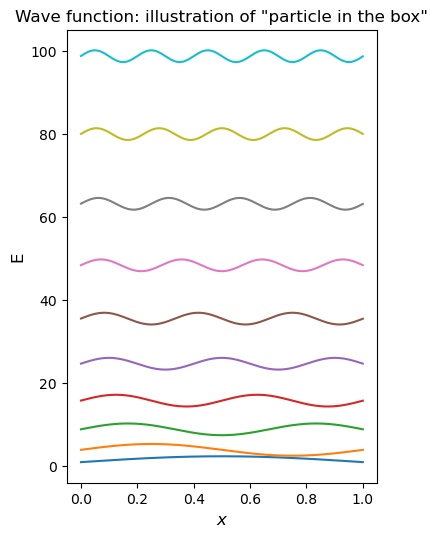

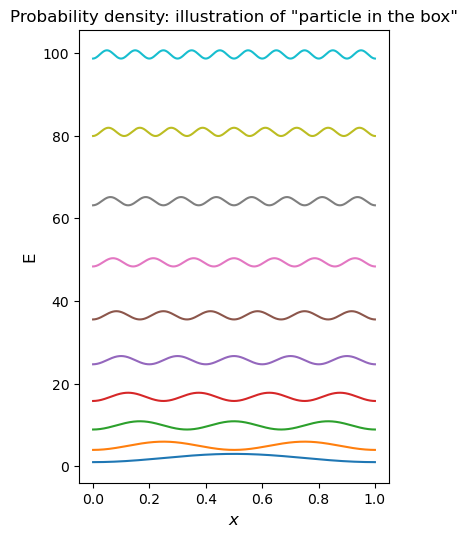

In [25]:
schrödinger(1, 999, True, 10, 'dirichlet', np.zeros(999), " \"particle in the box\"", 0.1,1)

 We also solve the problem for $V(X=700(0.5-|x-0.5|)$, a v-shaped potential and the solutions are plotted.

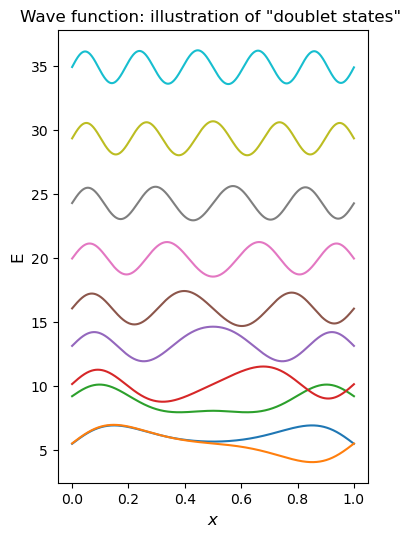

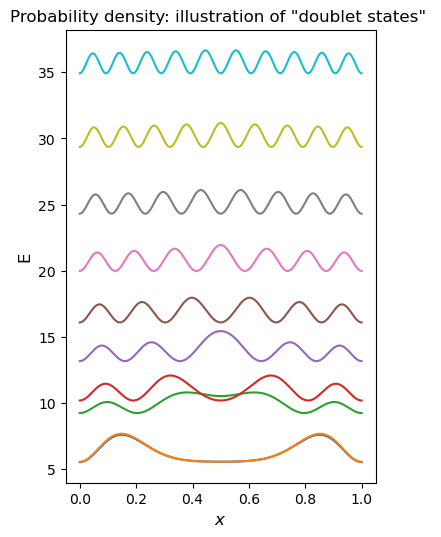

In [24]:
schrödinger(1, 2999, True, 10, 'dirichlet',700*(0.5-np.abs(np.linspace(0,1, num=2999)-0.5)), " \"doublet states\" ", 0.03,0.9,0.81)

We observe the effect of getting a doublet state, namely two states of almost the same energy (but different parity). We find this effect for the lower energy levels where we see almost identical probability densities and similar wave functions, but one odd and one even. The interested reader could also try this with a function such as $\sin^2{\pi x}$ and should find the same phenomena.